In [1]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


Load Dataset

In [2]:
import pandas as pd

# Load the CSV
df = pd.read_csv("AirPassengers.csv")
print(df.head())
print(df.info())


     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


Data Cleaning

In [3]:
# Rename column for ease of use
df.columns = ['Month', 'Passengers']

# Convert 'Month' to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Set Month as index (for time series analysis)
df.set_index('Month', inplace=True)

# Check for missing values
print(df.isnull().sum())


Passengers    0
dtype: int64


Data Transformations

In [4]:
# Add a column for Year and Month
df['Year'] = df.index.year
df['Month_Num'] = df.index.month

# Add Moving Average (rolling mean)
df['Moving_Avg'] = df['Passengers'].rolling(window=12).mean()


Three Insightful Visulizations

1. Monthly Passenger Trend

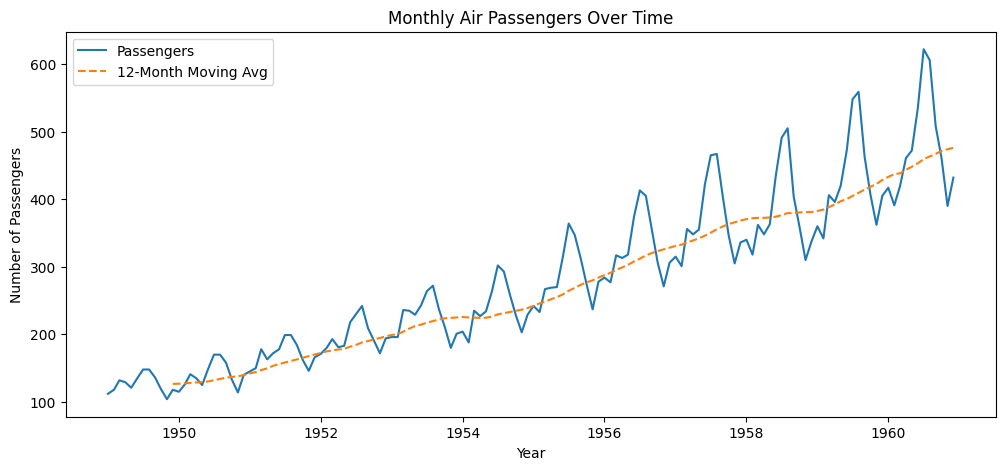

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Passengers'], label='Passengers')
plt.plot(df.index, df['Moving_Avg'], label='12-Month Moving Avg', linestyle='--')
plt.title('Monthly Air Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


2. Average Passengers by Year

<ipython-input-6-a2610fd561da>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_avg, x='Year', y='Passengers', palette='viridis')


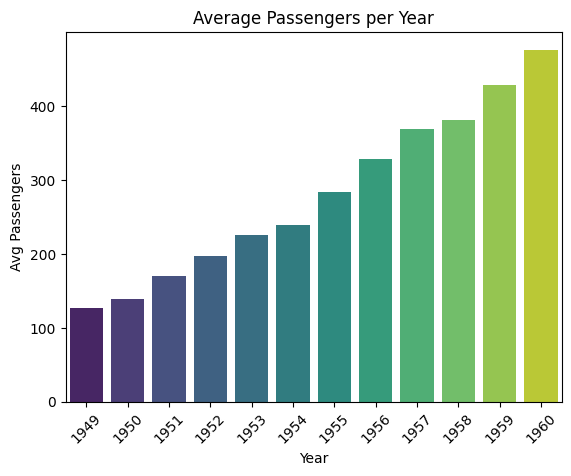

In [6]:
import seaborn as sns

yearly_avg = df.groupby('Year')['Passengers'].mean().reset_index()

sns.barplot(data=yearly_avg, x='Year', y='Passengers', palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Passengers per Year')
plt.ylabel('Avg Passengers')
plt.show()


3. Monthly Trend (Across Years)

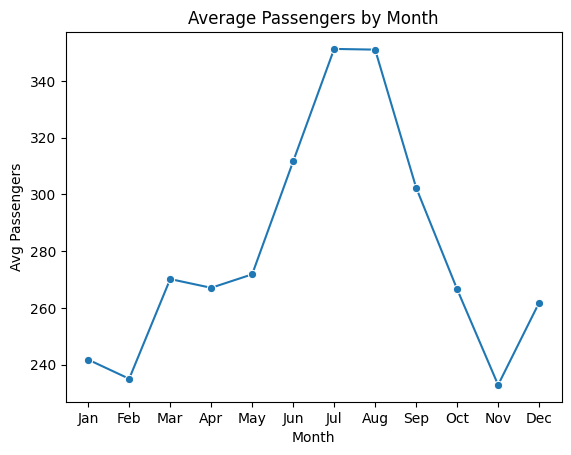

In [7]:
monthly_avg = df.groupby('Month_Num')['Passengers'].mean().reset_index()

sns.lineplot(data=monthly_avg, x='Month_Num', y='Passengers', marker='o')
plt.title('Average Passengers by Month')
plt.xlabel('Month')
plt.ylabel('Avg Passengers')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()
